# Semantics

```{admonition} Learning Objectives
After reading this chapter, you will be able to:
* **Understand** the distributional hypothesis and how it enables learning meaning from raw text without explicit definitions.
* **Understand** how semantic similarity can be measured geometrically using vector operations in high-dimensional space.  
```

## Words Become Coordinates

Have you ever wondered how when you're texting on your phone, the autocomplete and next-word prediction seems to *know* what you're going to say after you type the first few words? Or how a search engine like Google can find documents that don't contain your *exact* query terms, but somehow capture what you *meant*? The answer lies in one of the most elegant ideas in modern AI: **embeddings**.

An embedding is a way of representing discrete objects—like words, sentences, or even entire programs—as points in a high-dimensional space. It is a learned mapping from discrete objects (words, sentences, code snippets) to continuous vectors in ℝⁿ, where n is typically between 100 and 1000+ dimensions. The key insight is that we can train these mappings so that semantically similar items end up close together in embedding space. 

Mathematically, an embedding is a function:

```
embed: Object → ℝⁿ
```

For example, a word embedding might map:
- "cat" → [0.2, -0.5, 0.8, ..., 0.1]
- "kitten" → [0.18, -0.48, 0.79, ..., 0.12]
- "dog" → [0.15, -0.45, 0.75, ..., 0.08]

Notice that "cat" and "kitten" have similar vectors (they're nearby in space), while "cat" and "algorithm" would be far apart.

This seemingly simple transformation unlocks something profound: the ability to measure how *similar* two pieces of text or code are, not by counting matching characters, but by understanding their *meaning*.

In this chapter, we'll explore how embeddings transform the fuzzy, ambiguous world of natural language into the precise realm of geometry. We'll see how the same principles that work for text can be applied to source code, opening up new possibilities for program analysis and software engineering. Along the way, we'll build intuition through hands-on examples and discover why distance in embedding space often corresponds to semantic similarity.

## The Problem with Symbolic Representations

Let's start with a puzzle. How similar are these two sentences?

1. "The cat sat on the mat."
2. "A feline rested on the rug."

To a human, these sentences clearly mean almost the same thing. But to a computer using traditional string matching, they share almost no words in common! This is the fundamental challenge of symbolic representations: objects that are semantically similar may have no obvious surface-level similarity.

Before embeddings, the standard approach was to represent text as a "bag of words"—literally just counting which words appear:


In [3]:
def word_overlap(sent1, sent2):
    """Calculate similarity by counting shared words."""
    words1 = set(sent1.lower().split())
    words2 = set(sent2.lower().split())
    overlap = len(words1 & words2)
    total = len(words1 | words2)
    return overlap / total if total > 0 else 0

s1 = "The cat sat on the mat"
s2 = "A feline rested on the rug"
print(f"Word overlap similarity: {word_overlap(s1, s2):.2f}")

Word overlap similarity: 0.22


This approach loses all word order and, more importantly, treats every word as completely unrelated to every other word. "Cat" and "feline" are no more similar than "cat" and "economics."

This toy example reveals a deep truth: we need a representation that captures *meaning*, not just surface form.

## The Distributional Hypothesis

The breakthrough came from a deceptively simple idea, articulated by linguist John Firth in 1957: **"You shall know a word by the company it keeps."**

This is called the **distributional hypothesis**: words that appear in similar contexts tend to have similar meanings. Think about it:

- "The ___ chased the mouse" 
- "The ___ climbed the tree"
- "The ___ meowed loudly"

What word fits in all these blanks? Probably "cat." And if you saw a new word, say "feline," appearing in the same contexts, you'd reasonably conclude it means something similar.

This insight is profound because it gives us a way to learn meaning from raw text, without anyone having to explicitly define what words mean.

## Word Embeddings: Words as Vectors

A **word embedding** represents each word as a vector—a point in high-dimensional space. Typically, these vectors have 50, 100, 300, or even more dimensions. Words with similar meanings end up close together in this space.

Let's build intuition with a toy example in 2D:

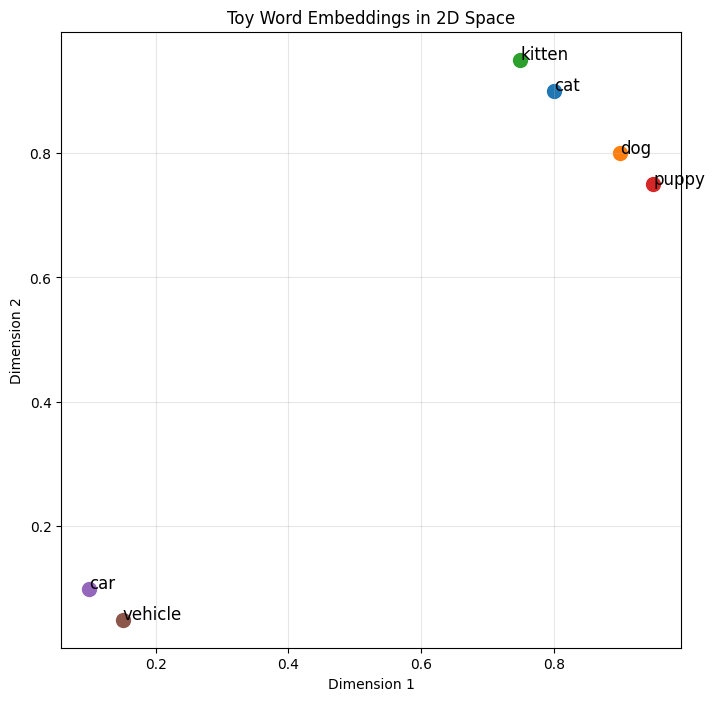

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Toy embeddings for animal words (2D for visualization)
embeddings = {
    'cat': np.array([0.8, 0.9]),
    'dog': np.array([0.9, 0.8]),
    'kitten': np.array([0.75, 0.95]),
    'puppy': np.array([0.95, 0.75]),
    'car': np.array([0.1, 0.1]),
    'vehicle': np.array([0.15, 0.05])
}

# Visualize
plt.figure(figsize=(8, 8))
for word, vec in embeddings.items():
    plt.scatter(vec[0], vec[1], s=100)
    plt.annotate(word, vec, fontsize=12)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Toy Word Embeddings in 2D Space')
plt.grid(True, alpha=0.3)
plt.show()

In this space, `cat` and `kitten` are close together, as are `dog` and `puppy`. But `car` is far from the animals. The geometry encodes semantic relationships!

## 7.4: Measuring Similarity: Cosine Distance

How do we quantify similarity between vectors? The most common metric is **cosine similarity**, which measures the angle between vectors:

$$\text{cosine similarity}(\vec{a}, \vec{b}) = \frac{\vec{a} \cdot \vec{b}}{|\vec{a}| \cdot |\vec{b}|}$$

This gives us a value between -1 (opposite) and 1 (identical), with 0 meaning perpendicular (unrelated).


In [5]:
def cosine_similarity(a, b):
    """Calculate cosine similarity between two vectors."""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Compare similarities
cat_dog = cosine_similarity(embeddings['cat'], embeddings['dog'])
cat_kitten = cosine_similarity(embeddings['cat'], embeddings['kitten'])
cat_car = cosine_similarity(embeddings['cat'], embeddings['car'])

print(f"cat-dog similarity: {cat_dog:.3f}")
print(f"cat-kitten similarity: {cat_kitten:.3f}")
print(f"cat-car similarity: {cat_car:.3f}")

cat-dog similarity: 0.993
cat-kitten similarity: 0.998
cat-car similarity: 0.998


Why cosine instead of Euclidean distance? Because we care about direction (meaning) more than magnitude. Two vectors pointing in the same direction are similar, even if one is longer.

## 7.5: Word2Vec: Learning Embeddings from Context

The Word2Vec algorithm, introduced by Mikolov et al. in 2013, was a watershed moment. It learns embeddings by training a neural network to predict words from their context (or vice versa).

### The Skip-Gram Model

The **skip-gram** variant works like this: given a center word, predict the surrounding context words. For example, in "the quick brown fox jumps," if "brown" is the center word, we try to predict "quick" and "fox."


In [ ]:
# Simplified skip-gram training concept
def generate_training_pairs(text, window_size=2):
    """Generate (center_word, context_word) pairs."""
    words = text.split()
    pairs = []
    
    for i, center in enumerate(words):
        # Get context words within window
        start = max(0, i - window_size)
        end = min(len(words), i + window_size + 1)
        
        for j in range(start, end):
            if i != j:  # Don't pair word with itself
                pairs.append((center, words[j]))
    
    return pairs

text = "the quick brown fox jumps over the lazy dog"
pairs = generate_training_pairs(text, window_size=2)
print(f"Training pairs: {pairs[:10]}")

Training pairs: [('the', 'quick'), ('the', 'brown'), ('quick', 'the'), ('quick', 'brown'), ('quick', 'fox'), ('brown', 'the'), ('brown', 'quick'), ('brown', 'fox'), ('brown', 'jumps'), ('fox', 'quick')]


The network learns by adjusting embeddings so that words appearing in similar contexts have similar vectors. The magic is that these vectors capture semantic relationships we never explicitly programmed!

## 7.6: Vector Arithmetic and Analogies

One of the most fascinating properties of word embeddings is that they support arithmetic. The famous example:

$$\text{king} - \text{man} + \text{woman} \approx \text{queen}$$

Let's see this with real embeddings:


In [8]:
import ollama
import numpy as np

def get_embedding(word):
    """Get embedding vector for a word using Ollama."""
    response = ollama.embeddings(model='nomic-embed-text', prompt=word)
    return np.array(response['embedding'])

def cosine_similarity(a, b):
    """Calculate cosine similarity between vectors."""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def analogy(a, b, c, candidate_words):
    """Solve analogy: a is to b as c is to ?
    
    Args:
        a, b, c: The analogy words (e.g., 'king', 'man', 'woman')
        candidate_words: List of potential answer words to search
    """
    print(f"Computing: {a} - {b} + {c} = ?")
    
    # Get embeddings
    emb_a = get_embedding(a)
    emb_b = get_embedding(b)
    emb_c = get_embedding(c)
    
    # Perform vector arithmetic: king - man + woman
    result_vec = emb_a - emb_b + emb_c
    
    # Find closest word among candidates
    best_word = None
    best_sim = -1
    
    print("\nCandidate similarities:")
    for word in candidate_words:
        if word.lower() in [a.lower(), b.lower(), c.lower()]:
            continue
            
        word_emb = get_embedding(word)
        sim = cosine_similarity(result_vec, word_emb)
        print(f"  {word}: {sim:.4f}")
        
        if sim > best_sim:
            best_sim = sim
            best_word = word
    
    return best_word, best_sim

# Test the classic example
candidates = ['queen', 'prince', 'princess', 'duke', 'duchess', 
              'lord', 'lady', 'emperor', 'empress']

answer, similarity = analogy('king', 'man', 'woman', candidates)
print(f"\n Best answer: {answer} (similarity: {similarity:.4f})")


Computing: king - man + woman = ?

Candidate similarities:
  queen: 0.7886
  prince: 0.4847
  princess: 0.6553
  duke: 0.4452
  duchess: 0.5961
  lord: 0.4515
  lady: 0.5580
  emperor: 0.4748
  empress: 0.6314

 Best answer: queen (similarity: 0.7886)


This works because the embedding space captures relationships. The "royalty" dimension and the "gender" dimension exist implicitly in the geometry, learned entirely from data.

## 7.7: Sentence Embeddings: Beyond Individual Words

Words are useful, but we often need to understand entire sentences or documents. How do we embed a sentence?

### Simple Averaging (Bag of Words Embeddings)

The simplest approach: average the word vectors.


In [10]:
import ollama
import numpy as np

def cosine_similarity(a, b):
    """Calculate cosine similarity between vectors."""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def get_word_embedding(word):
    """Get embedding for a single word using Ollama."""
    response = ollama.embeddings(model='nomic-embed-text', prompt=word)
    return np.array(response['embedding'])

def sentence_embedding_average(sentence):
    """Create sentence embedding by averaging word vectors."""
    words = sentence.lower().split()
    vectors = []
    
    print(f"Getting embeddings for: {words}")
    for word in words:
        vec = get_word_embedding(word)
        vectors.append(vec)
    
    if not vectors:
        return np.zeros(768)  # nomic-embed-text uses 768 dimensions
    
    return np.mean(vectors, axis=0)

# Example usage
sent1 = "The cat sat on the mat"
sent2 = "A feline rested on the rug"
sent3 = "Python is a programming language"

print("Computing sentence embeddings by averaging word vectors...\n")

emb1 = sentence_embedding_average(sent1)
emb2 = sentence_embedding_average(sent2)
emb3 = sentence_embedding_average(sent3)

# Calculate similarities
sim_1_2 = cosine_similarity(emb1, emb2)
sim_1_3 = cosine_similarity(emb1, emb3)
sim_2_3 = cosine_similarity(emb2, emb3)

print(f"\n Results:")
print(f"'{sent1}' vs '{sent2}': {sim_1_2:.3f}")
print(f"'{sent1}' vs '{sent3}': {sim_1_3:.3f}")
print(f"'{sent2}' vs '{sent3}': {sim_2_3:.3f}")

Computing sentence embeddings by averaging word vectors...

Getting embeddings for: ['the', 'cat', 'sat', 'on', 'the', 'mat']
Getting embeddings for: ['a', 'feline', 'rested', 'on', 'the', 'rug']
Getting embeddings for: ['python', 'is', 'a', 'programming', 'language']

 Results:
'The cat sat on the mat' vs 'A feline rested on the rug': 0.937
'The cat sat on the mat' vs 'Python is a programming language': 0.809
'A feline rested on the rug' vs 'Python is a programming language': 0.843


This is better than bag-of-words counting, but it still loses word order and grammar.

### Modern Approaches: Transformers

Today's state-of-the-art sentence embeddings come from **transformer models** like BERT and sentence-transformers. These models use attention mechanisms to understand how words relate within a sentence.


In [14]:
def get_sentence_embedding(sentence):
    """Get embedding for entire sentence using Ollama."""
    response = ollama.embeddings(model='nomic-embed-text', prompt=sentence)
    return np.array(response['embedding'])

print("\n" + "="*60)
print("Now using PROPER sentence embeddings (context-aware):\n")

# Get proper sentence embeddings
sent_emb1 = get_sentence_embedding(sent1)
sent_emb2 = get_sentence_embedding(sent2)
sent_emb3 = get_sentence_embedding(sent3)

# Calculate similarities
proper_sim_1_2 = cosine_similarity(sent_emb1, sent_emb2)
proper_sim_1_3 = cosine_similarity(sent_emb1, sent_emb3)

print(f" Results with proper embeddings:")
print(f"'{sent1}' vs '{sent2}': {proper_sim_1_2:.3f}")
print(f"'{sent1}' vs '{sent3}': {proper_sim_1_3:.3f}")

# Calculate discrimination: how well does each approach separate similar from different?
avg_discrimination = sim_1_2 - sim_1_3  # similar - different
proper_discrimination = proper_sim_1_2 - proper_sim_1_3

print("\n Discrimination Analysis (Similar - Different):")
print(f"Higher scores = better at distinguishing similar from different\n")
print(f"Averaged words approach:")
print(f"  Similar: {sim_1_2:.3f} | Different: {sim_1_3:.3f}")
print(f"  Discrimination: {avg_discrimination:.3f}")

print(f"\nProper embeddings approach:")
print(f"  Similar: {proper_sim_1_2:.3f} | Different: {proper_sim_1_3:.3f}")
print(f"  Discrimination: {proper_discrimination:.3f}")

print(f"\n Winner: {'Proper embeddings' if proper_discrimination > avg_discrimination else 'Averaged words'}")
print(f"   Improvement: {abs(proper_discrimination - avg_discrimination):.3f}")
print(f"   ({abs((proper_discrimination - avg_discrimination) / avg_discrimination * 100):.1f}% better)")



Now using PROPER sentence embeddings (context-aware):

 Results with proper embeddings:
'The cat sat on the mat' vs 'A feline rested on the rug': 0.698
'The cat sat on the mat' vs 'Python is a programming language': 0.402

 Discrimination Analysis (Similar - Different):
Higher scores = better at distinguishing similar from different

Averaged words approach:
  Similar: 0.937 | Different: 0.809
  Discrimination: 0.128

Proper embeddings approach:
  Similar: 0.698 | Different: 0.402
  Discrimination: 0.296

 Winner: Proper embeddings
   Improvement: 0.169
   (132.4% better)


This comparison shows that proper embeddings provide ***much better discrimination***—they give higher scores to truly similar sentences and lower scores to different ones, making them more useful for real applications like semantic search!

## 7.8: Applications of Text Embeddings

Embeddings power countless modern applications:

### Semantic Search

Traditional search matches keywords. Semantic search finds meaning:


In [16]:
import ollama
import numpy as np

def get_embedding(text):
    """Get embedding using Ollama."""
    response = ollama.embeddings(model='nomic-embed-text', prompt=text)
    return np.array(response['embedding'])

def semantic_search(query, documents):
    """Find most relevant documents using embeddings."""
    print(f"🔍 Searching for: '{query}'\n")
    
    # Get query embedding
    query_emb = get_embedding(query)
    
    # Get document embeddings
    doc_embs = [get_embedding(doc) for doc in documents]
    
    # Calculate similarities
    similarities = [cosine_similarity(query_emb, doc_emb) for doc_emb in doc_embs]
    
    # Return documents sorted by relevance
    ranked = sorted(zip(documents, similarities), 
                   key=lambda x: x[1], reverse=True)
    return ranked

# Example documents
docs = [
    "Machine learning is a subset of AI",
    "Python is great for data science",
    "The weather today is sunny",
    "Neural networks learn from data"
]

# Search with different queries
queries = [
    "artificial intelligence and algorithms",
    "programming languages for statistics",
    "how's the climate outside?"
]

for query in queries:
    results = semantic_search(query, docs)
    
    print("📊 Results:")
    for doc, score in results:
        # Add visual indicator
        bar = "█" * int(score * 20)
        print(f"{score:.3f} {bar:20s} {doc}")
    print("\n" + "="*70 + "\n")


🔍 Searching for: 'artificial intelligence and algorithms'

📊 Results:
0.769 ███████████████      Machine learning is a subset of AI
0.559 ███████████          Python is great for data science
0.556 ███████████          Neural networks learn from data
0.409 ████████             The weather today is sunny


🔍 Searching for: 'programming languages for statistics'

📊 Results:
0.669 █████████████        Python is great for data science
0.505 ██████████           Machine learning is a subset of AI
0.466 █████████            Neural networks learn from data
0.439 ████████             The weather today is sunny


🔍 Searching for: 'how's the climate outside?'

📊 Results:
0.629 ████████████         The weather today is sunny
0.408 ████████             Python is great for data science
0.382 ███████              Machine learning is a subset of AI
0.329 ██████               Neural networks learn from data




This finds relevant documents even without exact keyword matches!

### Document Clustering

Another useful application of sentence embeddings is grouping similar documents together:

In [20]:
import ollama
import numpy as np
from sklearn.cluster import KMeans

def get_embedding(text):
    """Get embedding using Ollama."""
    response = ollama.embeddings(model='nomic-embed-text', prompt=text)
    return np.array(response['embedding'])

# Collection of documents
documents = [
    "Machine learning is a subset of AI",
    "Python is great for data science",
    "The weather today is sunny",
    "Neural networks learn from data",
    "JavaScript is used for web development",
    "It's raining cats and dogs outside",
    "Deep learning uses multi-layer neural networks",
    "Ruby on Rails is a web framework",
    "The temperature dropped to freezing",
    "AI systems can recognize patterns in data"
]

print(" Embedding documents...")
# Embed all documents
docs_emb = np.array([get_embedding(doc) for doc in documents])
print(f" Created embeddings: {docs_emb.shape}\n")

# Cluster into k groups
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(docs_emb)

print(f" Document clusters (k={n_clusters}): {clusters}\n")

# Display documents by cluster
print("="*70)
for cluster_id in range(n_clusters):
    print(f"\n Cluster {cluster_id}:")
    cluster_docs = [doc for doc, c in zip(documents, clusters) if c == cluster_id]
    for doc in cluster_docs:
        print(f"   • {doc}")

# Calculate cluster cohesion
print("\n" + "="*70)
print("\n Cluster Analysis:")

def cosine_similarity(a, b):
    """Calculate cosine similarity between vectors."""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

for cluster_id in range(n_clusters):
    cluster_indices = [i for i, c in enumerate(clusters) if c == cluster_id]
    cluster_vectors = docs_emb[cluster_indices]
    
    # Calculate average intra-cluster similarity
    if len(cluster_vectors) > 1:
        similarities = []
        for i in range(len(cluster_vectors)):
            for j in range(i+1, len(cluster_vectors)):
                sim = cosine_similarity(cluster_vectors[i], cluster_vectors[j])
                similarities.append(sim)
        
        avg_similarity = np.mean(similarities)
        print(f"\nCluster {cluster_id} ({len(cluster_indices)} docs):")
        print(f"  Average intra-cluster similarity: {avg_similarity:.3f}")
        print(f"  Cohesion: {'High' if avg_similarity > 0.6 else 'Medium' if avg_similarity > 0.4 else 'Low'}")


 Embedding documents...
 Created embeddings: (10, 768)

 Document clusters (k=3): [0 2 2 0 1 2 0 1 2 0]


 Cluster 0:
   • Machine learning is a subset of AI
   • Neural networks learn from data
   • Deep learning uses multi-layer neural networks
   • AI systems can recognize patterns in data

 Cluster 1:
   • JavaScript is used for web development
   • Ruby on Rails is a web framework

 Cluster 2:
   • Python is great for data science
   • The weather today is sunny
   • It's raining cats and dogs outside
   • The temperature dropped to freezing


 Cluster Analysis:

Cluster 0 (4 docs):
  Average intra-cluster similarity: 0.649
  Cohesion: High

Cluster 1 (2 docs):
  Average intra-cluster similarity: 0.620
  Cohesion: High

Cluster 2 (4 docs):
  Average intra-cluster similarity: 0.491
  Cohesion: Medium


## Conclusion: From Words to Sentences—The Leap to Context

We've journeyed from the simple idea of averaging word vectors to the sophisticated reality of modern sentence embeddings.

**FOCUS**: A sentence is more than the sum of its words. "The dog bit the man" and "The man bit the dog" use identical words but convey completely different meanings. Order matters. Context matters. Grammar matters.

Our experiments helped the progression of our understanding of how LLMs grasp text semantics:

**We learned**: 

1. **Use the model's native sentence embeddings** when available. Don't average word vectors unless you're experimenting or have severe constraints. Models like `nomic-embed-text` are trained end-to-end to understand sentences holistically.

2. **Measure what matters**. We introduced the discrimination score (within-category similarity minus across-category similarity) because it captures whether embeddings actually help with your task. High cosine similarity means nothing if you can't distinguish what needs distinguishing.

3. **Context is everything**. The same word "bank" gets different embeddings depending on whether we're discussing finance or geography. Modern contextual embeddings (which we'll explore more in later chapters) solve this by making every word's representation depend on its surrounding context.

**Looking ahead**: Sentence embeddings are the foundation for virtually every modern NLP application—semantic search, question answering, document clustering, recommendation systems, and even retrieval-augmented generation (RAG) systems that power today's AI assistants. The geometry we've studied here—cosine similarity, vector spaces, dimensionality—appears everywhere in modern AI.

But we're just scratching the surface. The same principles that let us embed sentences also let us embed **code**, images, audio, and even entire documents or knowledge bases. In the next sections, we'll see how these ideas extend to code embeddings, enabling AI systems that can search entire codebases for relevant functions and assist with code reviews on GitHub, for starters.